<a href="https://colab.research.google.com/github/vishnu18/Melanoma_Detection/blob/main/Vishnu_Melanoma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

In [3]:
import os
path = os.getcwd()
print(path)
#!wget https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view


/content


In [ ]:
path = os.getcwd()
print(path)
!ls /content
!ls /content/sample_data/
!wget https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing/CNN_assignment.zip

/content
 drive	 sample_data  'view?usp=sharing'
anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md
--2024-01-15 04:06:08--  https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing/CNN_assignment.zip
Resolving drive.google.com (drive.google.com)... 172.217.214.101, 172.217.214.113, 172.217.214.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing%2FCNN_assignment.zip’

view?usp=sharing%2F     [ <=>                ]  82.98K  --.-KB/s    in 0.003s  

2024-01-15 04:06:09 (26.0 MB/s) - ‘view?usp=sharing%2FCNN_assignment.zip’ saved [84973]



# Loading DataSet

In [ ]:
!unzip /content/drive/MyDrive/CNN_assignment.zip -d  /content/drive/MyDrive/CNN

Archive:  /content/drive/MyDrive/CNN_assignment.zip
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imag

## Importing Libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Splitting Dataset into train and Validation

In [5]:
data_dir_train = pathlib.Path('/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
img_height=180
img_width=180
batch_size=32

In [8]:
#Creating train dataset using seed
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Data Exploration

In [9]:
#Creating validation dataset using seed 123
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
#printing all class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [14]:
for images, labels in train_ds.take(2):
  print(len(images))
  print(len(labels))

32
32
32
32


32
32
32
32


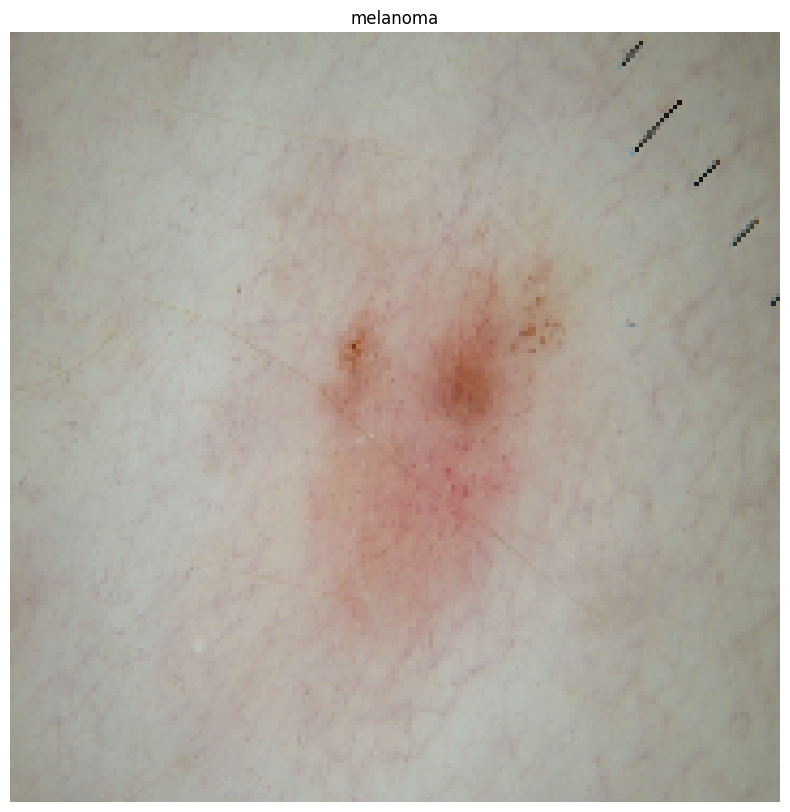

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  print(len(images))
  print(len(labels))
  plt.imshow(images[10].numpy().astype("uint8"))
  plt.title(class_names[labels[10]])
  plt.axis("off")

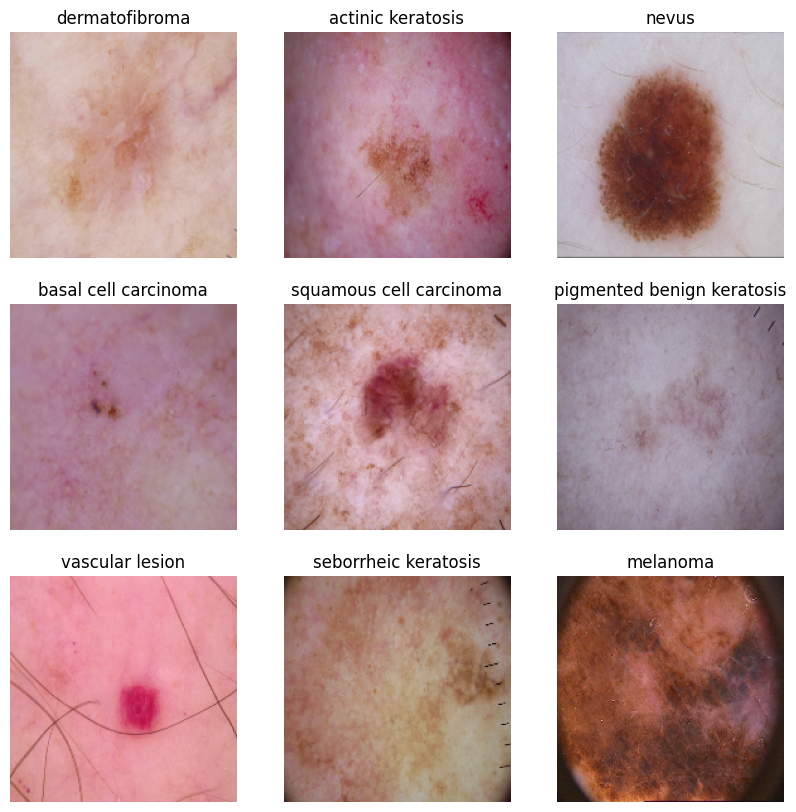

In [28]:
#### Create image plot for all class labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  labels_length=len(labels)
  class_list=[]
  i=0
  t=0
  while i<labels_length and len(class_list)<9:
    if class_names[labels[i]] not in class_list:
        ax = plt.subplot(3, 3, t + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        class_list.append(class_names[labels[i]])
        plt.axis("off")
        t=t+1
    i=i+1



#### 1. Building First Model Using CNN

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Using 20 epoch fitting the model

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 132s 2s/step - loss: 2.0570 - accuracy: 0.2511 - val_loss: 1.8106 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 90s 2s/step - loss: 1.7458 - accuracy: 0.3599 - val_loss: 1.5590 - val_accuracy: 0.4899
Epoch 3/20
56/56 [==============================] - 86s 2s/step - loss: 1.5021 - accuracy: 0.4799 - val_loss: 1.3983 - val_accuracy: 0.5436
Epoch 4/20
56/56 [==============================] - 85s 2s/step - loss: 1.3964 - accuracy: 0.5167 - val_loss: 1.3504 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 82s 1s/step - loss: 1.2446 - accuracy: 0.5608 - val_loss: 1.3847 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 81s 1s/step - loss: 1.2262 - accuracy: 0.5647 - val_loss: 1.4255 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 85s 2s/step - loss: 1.1249 - accuracy: 0.5932 - val_loss: 1.4232 - val_accuracy: 0.5145
Epoch 8/20
56/56 [=

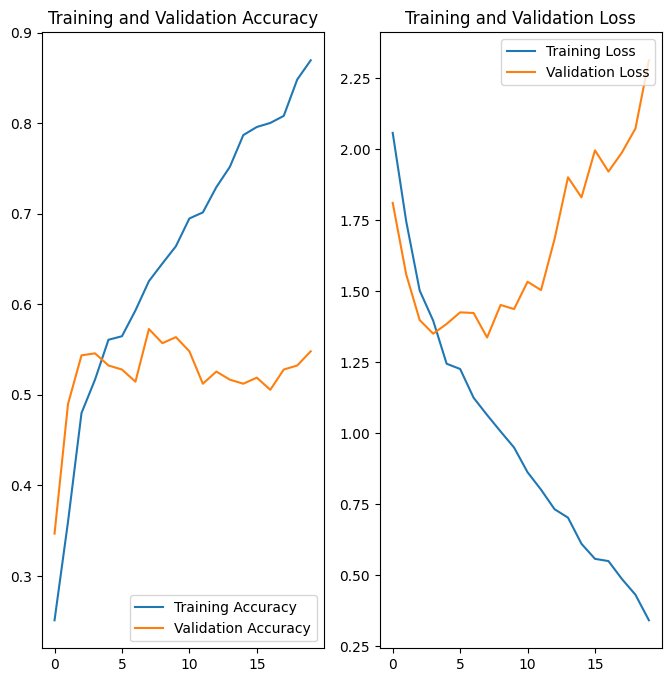

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We observe that modelis overfitting as Training Accuracy is more but Validation accuracy is less

In [32]:
train_dir = os.path.join('/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
val_dir = os.path.join('/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

### Using Keras data Generator and Augmentation to reduce Overfitting of Model

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#### Developing Model 2 using CNN

In [35]:
#Create a CNN model
#Experiment #1
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# Import layers explicitly to keep our code compact
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = Sequential()

#2D convolution layer (e.g. spatial convolution over images).
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))

#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens the input. Does not affect the batch size.
model.add(Flatten())

#https://keras.io/api/layers/regularization_layers/dropout/
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

#Just your regular densely-connected NN layer.
#Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
#It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
#Dense implements the operation: output = activation(dot(input, kernel)
model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=10
)

Epoch 1/10
23/23 [==============================] - 303s 13s/step - loss: 3.7028 - accuracy: 0.1599 - val_loss: 2.1551 - val_accuracy: 0.1186
Epoch 2/10
23/23 [==============================] - 247s 11s/step - loss: 1.8953 - accuracy: 0.2796 - val_loss: 2.1981 - val_accuracy: 0.2627
Epoch 3/10
23/23 [==============================] - 269s 12s/step - loss: 1.7566 - accuracy: 0.3510 - val_loss: 2.3174 - val_accuracy: 0.3051
Epoch 4/10
23/23 [==============================] - 258s 11s/step - loss: 1.6225 - accuracy: 0.4154 - val_loss: 2.3466 - val_accuracy: 0.2966
Epoch 5/10
23/23 [==============================] - 259s 11s/step - loss: 1.5803 - accuracy: 0.4332 - val_loss: 2.3899 - val_accuracy: 0.2966
Epoch 6/10
23/23 [==============================] - 260s 11s/step - loss: 1.5243 - accuracy: 0.4578 - val_loss: 2.6376 - val_accuracy: 0.3051
Epoch 7/10
23/23 [==============================] - 267s 12s/step - loss: 1.5255 - accuracy: 0.4623 - val_loss: 2.2354 - val_accuracy: 0.3220
Epoch 

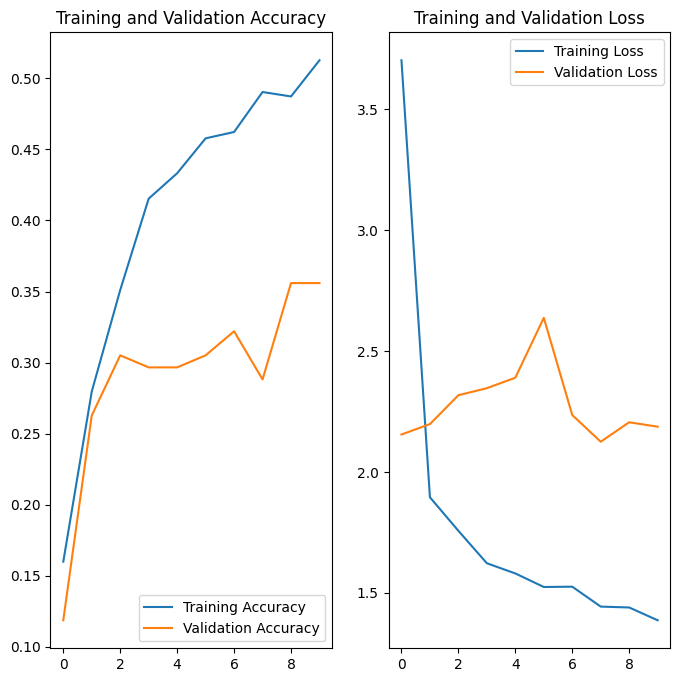

In [36]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model is still not perform and shows signs of overfitting

In [37]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [38]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
1,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
2,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
3,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
4,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,vascular lesion
2235,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,vascular lesion
2236,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,vascular lesion
2237,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


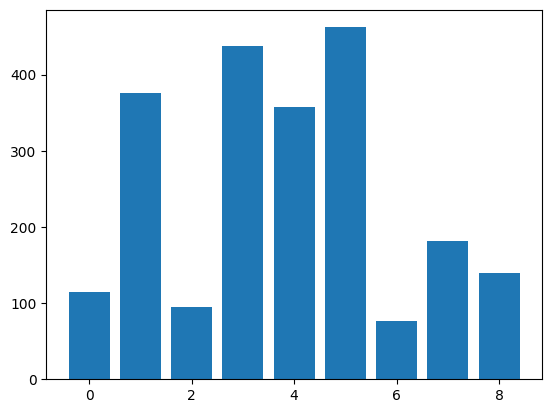

In [39]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### From above graph we observe that classes are imbalanced resulting in model overfitting

In [40]:
!pip install Augmentor

In [41]:
datapath = r'/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis'
import Augmentor
p = Augmentor.Pipeline(datapath)
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.sample(150)
p.process()

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFC8ADE14E0>: 100%|██████████| 150/150 [00:09<00:00, 15.04 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFC8AF99390>: 100%|██████████| 114/114 [00:05<00:00, 20.10 Samples/s]


#### Generating more Data to reduce imbalance among classes

In [44]:
path_to_training_dataset="/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFC83376A40>: 100%|██████████| 500/500 [00:25<00:00, 19.69 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFC85D91D20>: 100%|██████████| 500/500 [00:25<00:00, 19.34 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFC8AA47AF0>: 100%|██████████| 500/500 [00:30<00:00, 16.51 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BFD24889690>: 100%|██████████| 500/500 [01:46<00:00,  4.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7BFC84E6BFD0>: 100%|██████████| 500/500 [01:41<00:00,  4.91 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFC8AA47400>: 100%|██████████| 500/500 [00:24<00:00, 20.68 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7BFC8AFC7BB0>: 100%|██████████| 500/500 [00:51<00:00,  9.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFC8AFC7070>: 100%|██████████| 500/500 [00:27<00:00, 17.88 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFC85D31ED0>: 100%|██████████| 500/500 [00:24<00:00, 20.70 Samples/s]


In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4764


In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [48]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df['Label'].value_counts()

<ipython-input-48-d2b85d1498ec>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


pigmented benign keratosis    962
melanoma                      938
actinic keratosis             878
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [49]:
batch_size = 32
img_height = 180
img_width = 180

### Building Model 3 using CNN

In [50]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7003 files belonging to 9 classes.
Using 5603 files for training.


In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7003 files belonging to 9 classes.
Using 1400 files for validation.


In [52]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
176/176 [==============================] - 351s 2s/step - loss: 1.7926 - accuracy: 0.3188 - val_loss: 1.4601 - val_accuracy: 0.4429
Epoch 2/20
176/176 [==============================] - 265s 2s/step - loss: 1.3968 - accuracy: 0.4817 - val_loss: 1.2495 - val_accuracy: 0.5379
Epoch 3/20
176/176 [==============================] - 263s 1s/step - loss: 1.2017 - accuracy: 0.5568 - val_loss: 1.2052 - val_accuracy: 0.5643
Epoch 4/20
176/176 [==============================] - 262s 1s/step - loss: 1.0250 - accuracy: 0.6272 - val_loss: 0.9688 - val_accuracy: 0.6621
Epoch 5/20
176/176 [==============================] - 266s 2s/step - loss: 0.8452 - accuracy: 0.6911 - val_loss: 0.9037 - val_accuracy: 0.6836
Epoch 6/20
176/176 [==============================] - 267s 2s/step - loss: 0.6818 - accuracy: 0.7605 - val_loss: 0.7478 - val_accuracy: 0.7493
Epoch 7/20
176/176 [==============================] - 268s 2s/step - loss: 0.5480 - accuracy: 0.8067 - val_loss: 0.8274 - val_accuracy: 0.7250

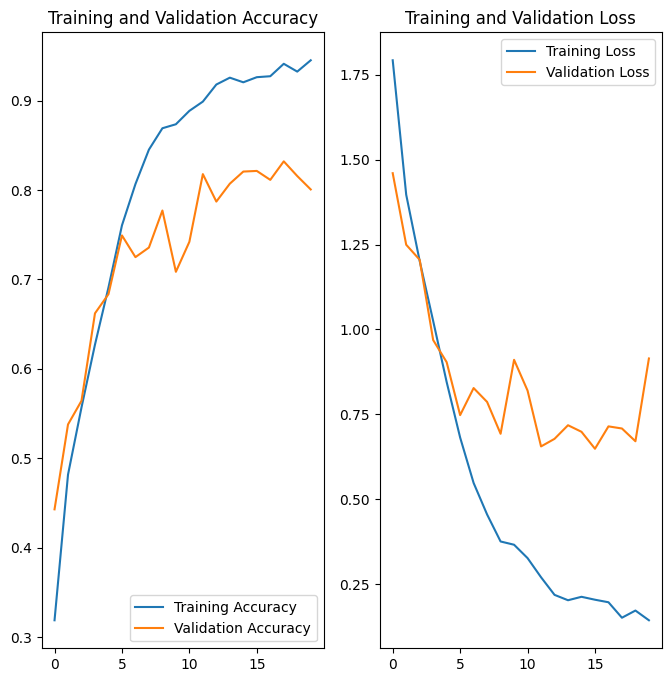

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We observe better accuracy in Traning and Validation. We observe reduction in validation loss as well

In [84]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [85]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
len(lesion_list)

118

In [86]:
test_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Evaluating the model using Test Dataset

In [87]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [88]:
score = model.evaluate(test_ds,verbose=0)

In [89]:
score

[8.22265625, 0.347457617521286]